# <span style="color:green"> Numerical Simulation Laboratory </span>
## Odalys Barrionuevo
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

---

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### <span style="color:green"> Commento : </span>
<span style="color:green"> Nel seguente esercizio verrà usata una rete neurale per fare una regressione lineare. La rete verrà quindi allenata usando dei dati noti (ricavati dalla funzione di sopra soggetti ad un eventuale errore) in modo tale che possa predire il valore che assume nei nuovi dati che non conosce. Si vedrà come la rete dipende fortemente dal numero di epoche, numero di dati con cui viene allenata e il rumore.</span>

### <span style="color:green"> $N_{train} = 50,\ N_{valid} = 5,\ N_{epoch} = 20,\ \sigma = 0.0$ </span>

<span style="color:green"> Come si può notare dai risultati ottenuti sotto, con questi dati la rete non predice bene il coefficiente angolare e l'intercetta della retta, nonostante il rumore dei dati di input sia 0.0. Evidentemente sono stati usati pochi dati per il training e/o il numero di epoche è troppo piccolo. Inoltre si può vedere anche come l'errore della loss del test tenda a crescere rispetto alla loss del training.</span>

In [33]:
import numpy as np
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 50)
x_valid = np.random.uniform(-1, 1, 5)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function (senza rumore)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [34]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [35]:
# get a summary of our composed model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 5.8127 - mse: 5.8127 - val_loss: 5.3691 - val_mse: 5.3691
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.9158 - mse: 4.9158 - val_loss: 5.1734 - val_mse: 5.1734
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7037 - mse: 4.7037 - val_loss: 4.9862 - val_mse: 4.9862
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.6738 - mse: 4.6738 - val_loss: 4.8165 - val_mse: 4.8165
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.7871 - mse: 4.7871 - val_loss: 4.6681 - val_mse: 4.6681
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.3124 - mse: 4.3124 - val_loss: 4.5169 - val_mse: 4.5169
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.2130 - mse: 4.2130 - val_loss: 4.3771 - val_mse: 4.3771
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.8328 - mse: 3.8328 - val_loss: 4.2347 - val_mse: 4.2347
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3.8455 - mse: 3.8455 -

In [37]:
# return weights and biases
model.get_weights()

[array([[-0.7900186]], dtype=float32), array([0.67680484], dtype=float32)]

In [38]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.0195 - mse: 3.0195

Test loss: 3.019465446472168
Test accuracy: 3.019465446472168
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.0195 - mse: 3.0195

Test loss: 3.019465446472168
Test accuracy: 3.019465446472168


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


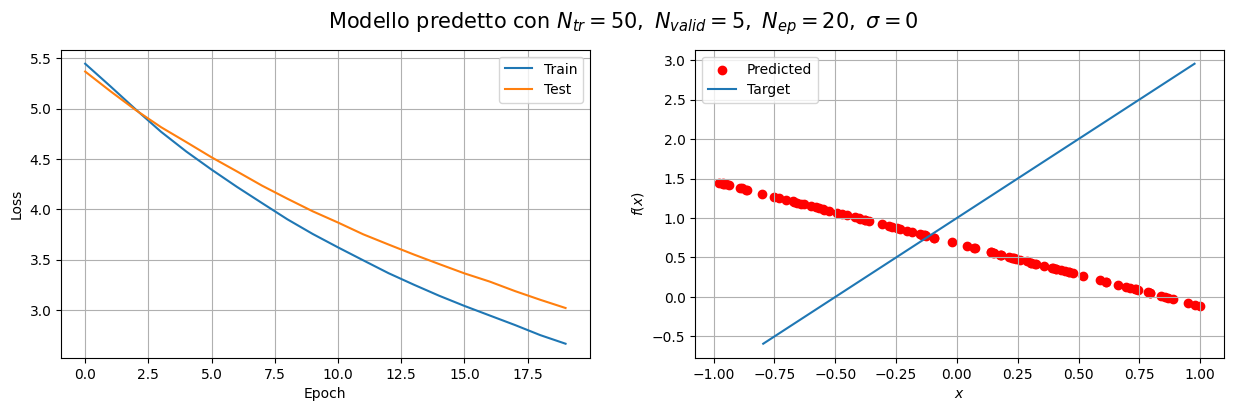

In [39]:
# look into training history
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{tr}=50,\ N_{valid}=5,\ N_{ep}=20,\ \sigma=0$',fontsize=15)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='red', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


---

### <span style="color:green"> $N_{train} = 50,\ N_{valid} = 5,\ N_{epoch} = 100,\ \sigma = 0.0$ </span>

<span style="color:green"> I risultati ottenuti modificando, rispetto a prima, solo il numero di epoche mostra che la funzione di loss del test diminuisce avvicinandosi sempre di più alla loss del training. I parametri della retta (coefficiente ed intercetta) sono migliorati ma ancora non ottimali. Nonostante il numero di epoche sia aumentato evidentemente la rete non usa abbastanza dati per il training.</span>

In [84]:
import numpy as np
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 50)
x_valid = np.random.uniform(-1, 1, 5)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function (senza rumore)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [85]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [86]:
# get a summary of our composed model
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 3.9349 - mse: 3.9349 - val_loss: 3.6265 - val_mse: 3.6265
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.6879 - mse: 3.6879 - val_loss: 3.4852 - val_mse: 3.4852
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.4311 - mse: 3.4311 - val_loss: 3.3461 - val_mse: 3.3461
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.1911 - mse: 3.1911 - val_loss: 3.2138 - val_mse: 3.2138
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1199 - mse: 3.1199 - val_loss: 3.0934 - val_mse: 3.0934
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.1906 - mse: 3.1906 - val_loss: 2.9882 - val_mse: 2.9882
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.8465 - mse: 2.8465 - val_loss: 2.8787 - val_mse: 2.8787
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.6410 - mse: 2.6410 - val_loss: 2.7742 - val_mse: 2.7742
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.4697 - mse:

In [88]:
# return weights and biases
model.get_weights()

[array([[1.1675172]], dtype=float32), array([1.0660093], dtype=float32)]

In [89]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2846 - mse: 0.2846

Test loss: 0.2846420705318451
Test accuracy: 0.2846420705318451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2846 - mse: 0.2846

Test loss: 0.2846420705318451
Test accuracy: 0.2846420705318451


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


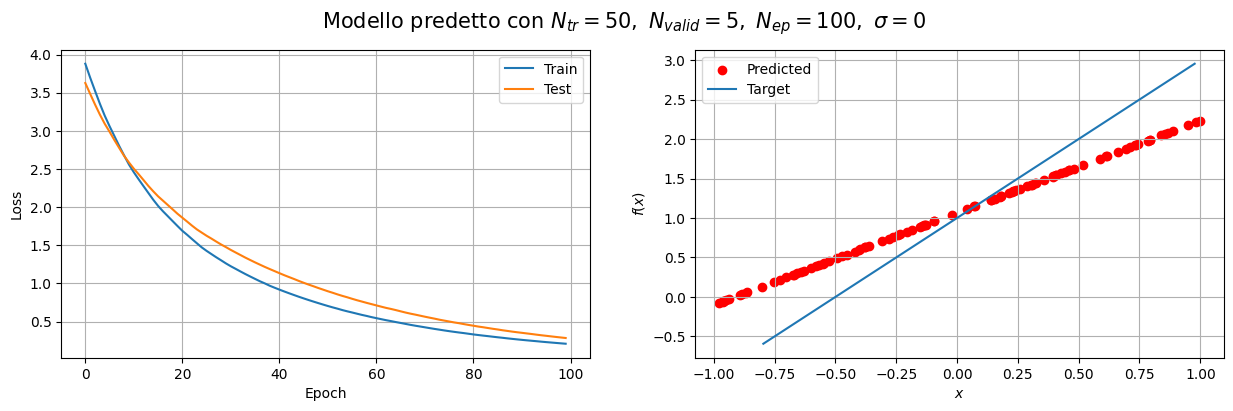

In [90]:
# look into training history
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{tr}=50,\ N_{valid}=5,\ N_{ep}=100,\ \sigma=0$',fontsize=15)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='red', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

---

### <span style="color:green"> $N_{train} = 500,\ N_{valid} = 50,\ N_{epoch} = 20,\ \sigma = 0.0$ </span>

<span style="color:green"> In questo trainig abbiamo aumentato di un ordine di grandezza il numero di dati con cui la rete si allena. Rispetto al primo (con pochi dati e ugual numero di epoche) e al secondo (pochi dati ma grande numero di epoche) test la predizione è migliorata. Nonostante ogni epoca usi più dati per il calcolo del gradiente il numero di epoche è ancora troppo basso. </span>

In [91]:
import numpy as np
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function (senza rumore)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [92]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [93]:
# get a summary of our composed model
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.2946 - mse: 4.2946 - val_loss: 3.0504 - val_mse: 3.0504
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3419 - mse: 3.3419 - val_loss: 2.3492 - val_mse: 2.3492
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3595 - mse: 2.3595 - val_loss: 1.8365 - val_mse: 1.8365
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8760 - mse: 1.8760 - val_loss: 1.4487 - val_mse: 1.4487
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4984 - mse: 1.4984 - val_loss: 1.1541 - val_mse: 1.1541
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1964 - mse: 1.1964 - val_loss: 0.9228 - val_mse: 0.9228
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9759 - mse: 0.9759 - val_loss: 0.7400 - val_mse: 0.7400
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7728 - mse: 0.7728 - val_loss: 0.5938 - val_mse: 0.5938
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5998 - mse:

In [95]:
# return weights and biases
model.get_weights()

[array([[1.6295555]], dtype=float32), array([0.9945645], dtype=float32)]

In [96]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0424 - mse: 0.0424 

Test loss: 0.043593939393758774
Test accuracy: 0.043593939393758774
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mse: 0.0424 

Test loss: 0.043593939393758774
Test accuracy: 0.043593939393758774


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


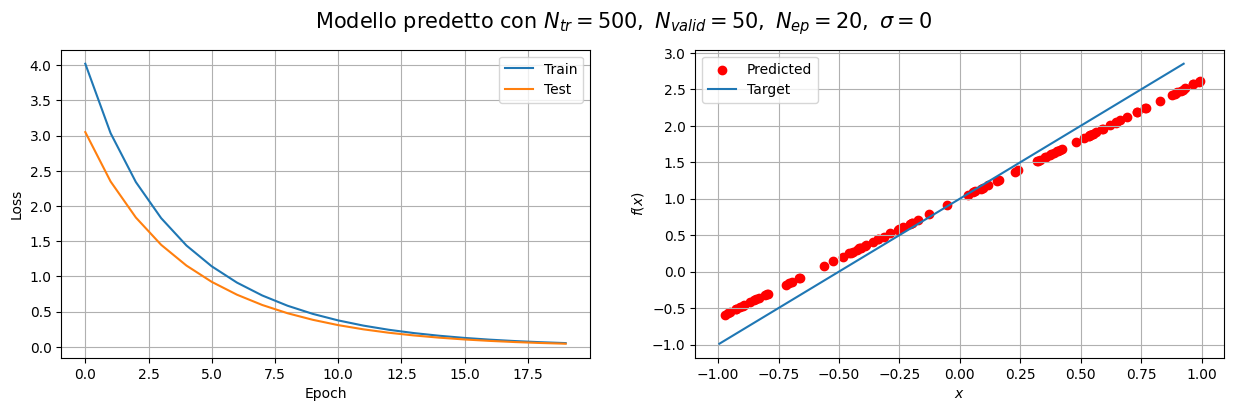

In [97]:
# look into training history
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{tr}=500,\ N_{valid}=50,\ N_{ep}=20,\ \sigma=0$',fontsize=15)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='red', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

---

### <span style="color:green"> $N_{train} = 500,\ N_{valid} = 50,\ N_{epoch} = 100,\ \sigma = 0.0$ </span>

<span style="color:green"> Di seguito si può notare come invece aumentando sia i dati per il training che il numero di epoche (lasciando sempre $\sigma$ nullo) i risultati siano ottimi rispetto ai precedenti test </span>

In [98]:
import numpy as np
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function (senza rumore)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [99]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [100]:
# get a summary of our composed model
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4301 - mse: 2.4301 - val_loss: 1.6454 - val_mse: 1.6454
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6329 - mse: 1.6329 - val_loss: 1.2051 - val_mse: 1.2051
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1881 - mse: 1.1881 - val_loss: 0.9070 - val_mse: 0.9070
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9885 - mse: 0.9885 - val_loss: 0.6990 - val_mse: 0.6990
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7542 - mse: 0.7542 - val_loss: 0.5483 - val_mse: 0.5483
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.4340 - val_mse: 0.4340
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4496 - mse: 0.4496 - val_loss: 0.3455 - val_mse: 0.3455
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3785 - mse: 0.3785 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2

In [102]:
# return weights and biases
model.get_weights()

[array([[1.9999591]], dtype=float32), array([0.99999964], dtype=float32)]

In [103]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1975e-10 - mse: 5.1975e-10 

Test loss: 5.319604201581285e-10
Test accuracy: 5.319604201581285e-10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1975e-10 - mse: 5.1975e-10 

Test loss: 5.319604201581285e-10
Test accuracy: 5.319604201581285e-10


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


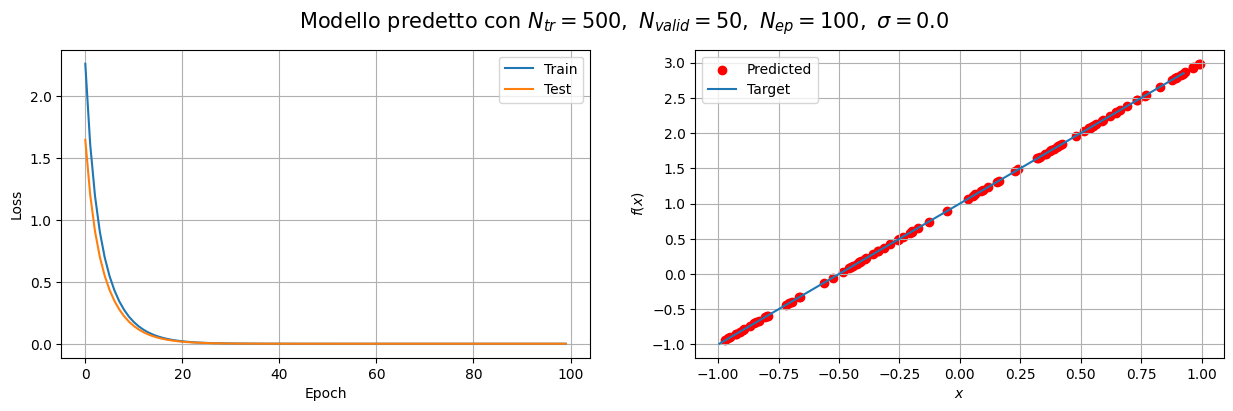

In [104]:
# look into training history
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{tr}=500,\ N_{valid}=50,\ N_{ep}=100,\ \sigma=0.0$',fontsize=15)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='red', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

---

### <span style="color:green"> $N_{train} = 500,\ N_{valid} = 50,\ N_{epoch} = 20,\ \sigma = 0.6$ </span>

<span style="color:green"> Notiamo come aggiungendo un rumore ($\sigma = 0.6$) ad un test precedentemente svolto (con tanti dati ma poche epoche) non porti ad una performance ottimale ma migliora i risultati. </span>

In [167]:
import numpy as np
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function (senza rumore)

sigma = 0.6 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [168]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [169]:
# get a summary of our composed model
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [170]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0762 - mse: 2.0762 - val_loss: 1.7004 - val_mse: 1.7004
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4004 - mse: 1.4004 - val_loss: 1.2991 - val_mse: 1.2991
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9595 - mse: 0.9595 - val_loss: 1.0431 - val_mse: 1.0431
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9235 - mse: 0.9235 - val_loss: 0.8687 - val_mse: 0.8687
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7934 - mse: 0.7934 - val_loss: 0.7488 - val_mse: 0.7488
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6350 - mse: 0.6350 - val_loss: 0.6616 - val_mse: 0.6616
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5840 - mse: 0.5840 - val_loss: 0.5974 - val_mse: 0.5974
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5058 - mse: 0.5058 - val_loss: 0.5510 - val_mse: 0.5510
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5510 - mse:

In [171]:
# return weights and biases
model.get_weights()

[array([[1.8883971]], dtype=float32), array([0.9301271], dtype=float32)]

In [172]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3999 - mse: 0.3999 

Test loss: 0.40562018752098083
Test accuracy: 0.40562018752098083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mse: 0.0062 

Test loss: 0.008038917556405067
Test accuracy: 0.008038917556405067


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


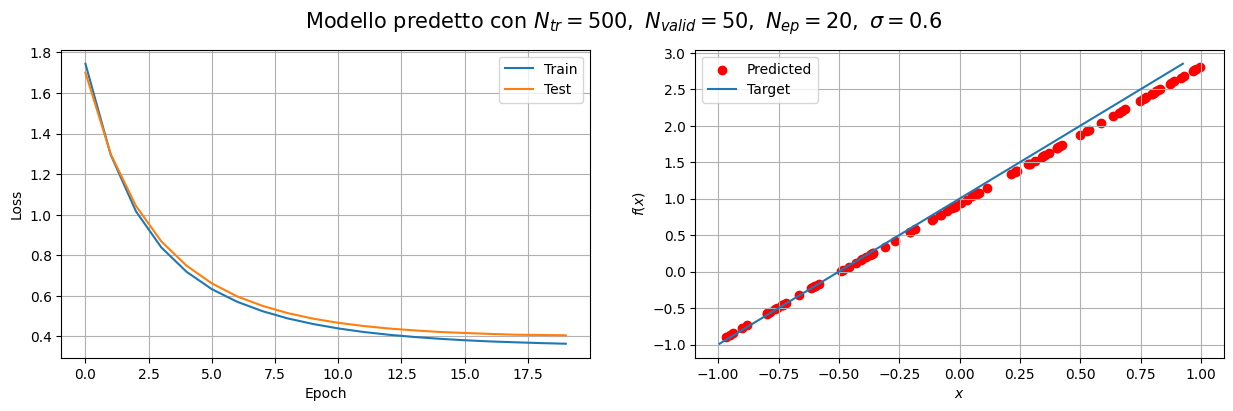

In [174]:
# look into training history
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{tr}=500,\ N_{valid}=50,\ N_{ep}=20,\ \sigma=0.6$',fontsize=15)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='red', label='Predicted')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

---

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### <span style="color:green"> Commento: </span>

<span style="color:green"> Nel seguente esercizio usiamo un polinomio di terzo grado per ricavare i dati con cui fare il training alla rete. Non essendo più una funzione lineare come l'esercizio precedente non basterà più un solo neurone per comporre la NN. La funzione è continua, perciò basterebbe un solo layer nascosco per costruire la NN. Però per addestrare meglio la NN alla non linearità e per distribuire il carico sono stati usati due layer nascosti con 8 neuroni l'uno e un layer di output di un solo neurone. Un numero troppo grande di neuroni potrebbe portare ad un problema di overfitting e un numero troppo piccolo potrebbe non catturare abbastanza la complessità del polinomio. Per una funzione che presenta delle non linearità è stata usata tanh come funzione di attivazione. La loss function usata è MSE e come ottimizzatore è stato usato Adam (con learning_rate di 0.01) perchè si adatta e tiene traccia dei gradienti.</span>

<span style="color:green"> Sotto viene mostrato come la rete neurale costruita porti ad una buona rappresentazione della funzione nel dominio in cui è stata allenata. Al di fuori del dominio si può vedere che non è più in grado di predire bene i valori che assume la funzione. </span>

In [ ]:
import numpy as np
a = 3
b = -2
c = -3
d = 4

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()

y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d

sigma = 0.1
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma)
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

In realtà per una funzione continua basterebbe un hidden layer. Ma per distribuire meglio il carico ho deciso si usare 2 hidden layers con meno neuroni l'uno.

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(units = 8, input_shape=(1,), activation = 'tanh'))
model.add(Dense(units = 8, activation = 'tanh'))
model.add(Dense(units = 1))

keras.optimizers.Adam(learning_rate=0.01, decay=0.0)

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x = x_train, y = y_train,
                    batch_size = 16, epochs = 80,
                    shuffle = True,
                    validation_data = (x_valid, y_valid))
score = model.evaluate(x_valid, y_target, batch_size = 16)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.7204 - mse: 5.7204 - val_loss: 0.3547 - val_mse: 0.3547
Epoch 2/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3145 - mse: 0.3145 - val_loss: 0.1948 - val_mse: 0.1948
Epoch 3/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1601 - mse: 0.1601 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 4/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0702 - mse: 0.0702 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 5/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 6/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 7/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 8/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 9/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


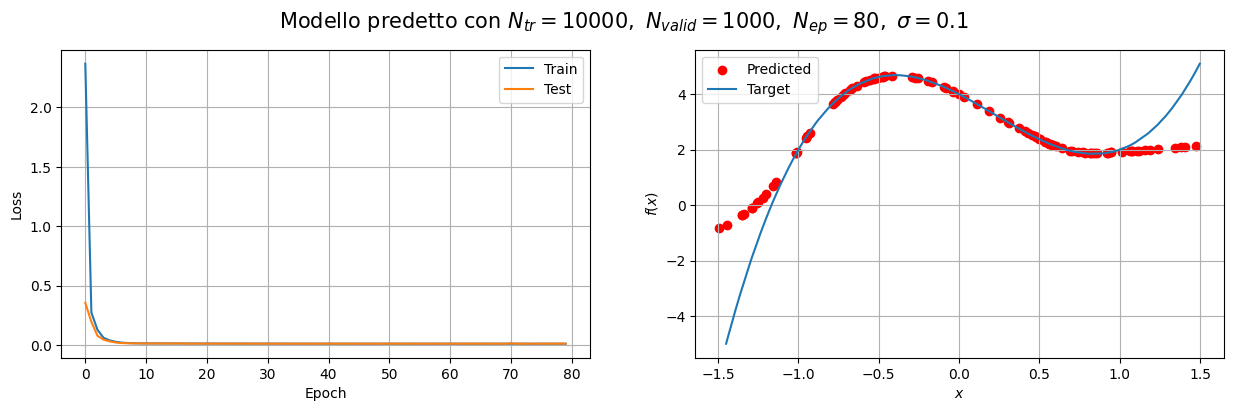

In [ ]:
# look into training history
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.suptitle('Modello predetto con $N_{tr}=10000,\ N_{valid}=1000,\ N_{ep}=80,\ \sigma=0.1$',fontsize=15)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(1,2,2)
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
x_vera = np.random.uniform(-1.5, 1.5, 100)
x_vera.sort()
y_vera = a * x_vera**3 + b * x_vera**2 + c * x_vera + d
plt.scatter(x_predicted, y_predicted, color='red', label='Predicted')
plt.plot(x_vera, y_vera, label='Target')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### <span style="color:green"> Commento: </span>

<span style="color:green"> La funzione trigonometrica con dominio in 2D da fittare è non lineare ma continua, perciò non serviranno tanti layers nascosti per costruire la rete neurale. Il numero di layer nascosti scelto è 3 (con 10, 10 e 6 neuroni nel primo, secondo e terzo layer rispettivamente), per catturare la complessità della funzione, con l'aggiunta di un layer di output con un solo neurone (dato che mi deve restituire un solo valore in $R$).</span>

In [185]:
import numpy as np

np.random.seed(0)
xy_train = np.zeros((10000, 2))
xy_train[:, 0] = np.random.uniform(-1.5, 1.5, 10000)
xy_train[:, 1] = np.random.uniform(-1.5, 1.5, 10000)

xy_valid = np.zeros((1000, 2))
xy_valid[:, 0] = np.random.uniform(-1.5, 1.5, 1000)
xy_valid[:, 1] = np.random.uniform(-1.5, 1.5, 1000)
xy_valid[:, 0].sort()
xy_valid[:, 1].sort()

z_target = np.sin(xy_valid[:, 0]**2 + xy_valid[:, 1]**2)

sigma = 0.1
z_train = np.random.normal(np.sin(xy_train[:,0]**2 + xy_train[:,1]**2), sigma)
z_valid = np.random.normal(np.sin(xy_valid[:,0]**2 + xy_valid[:,1]**2), sigma)

In [189]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(units = 10, input_shape=(2,), activation = 'tanh'))
model.add(Dense(units = 10, activation = 'tanh'))
model.add(Dense(units = 6, activation = 'tanh'))
model.add(Dense(units = 1))

keras.optimizers.Adam(learning_rate=0.01, decay=0.0)

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

In [190]:
history = model.fit(x = xy_train, y = z_train,
                    batch_size = 16, epochs = 100,
                    shuffle = True,
                    validation_data = (xy_valid, z_valid))
score = model.evaluate(xy_valid, z_target, batch_size = 16)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2434 - mse: 0.2434 - val_loss: 0.3765 - val_mse: 0.3765
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1652 - mse: 0.1652 - val_loss: 0.3757 - val_mse: 0.3757
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1494 - mse: 0.1494 - val_loss: 0.3143 - val_mse: 0.3143
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1328 - mse: 0.1328 - val_loss: 0.2890 - val_mse: 0.2890
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1320 - mse: 0.1320 - val_loss: 0.2726 - val_mse: 0.2726
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.2444 - val_mse: 0.2444
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1136 - mse: 0.1136 - val_loss: 0.2110 - val_mse: 0.2110
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1046 - mse: 0.1046 - val_loss: 0.1535 - val_mse: 0.1535
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


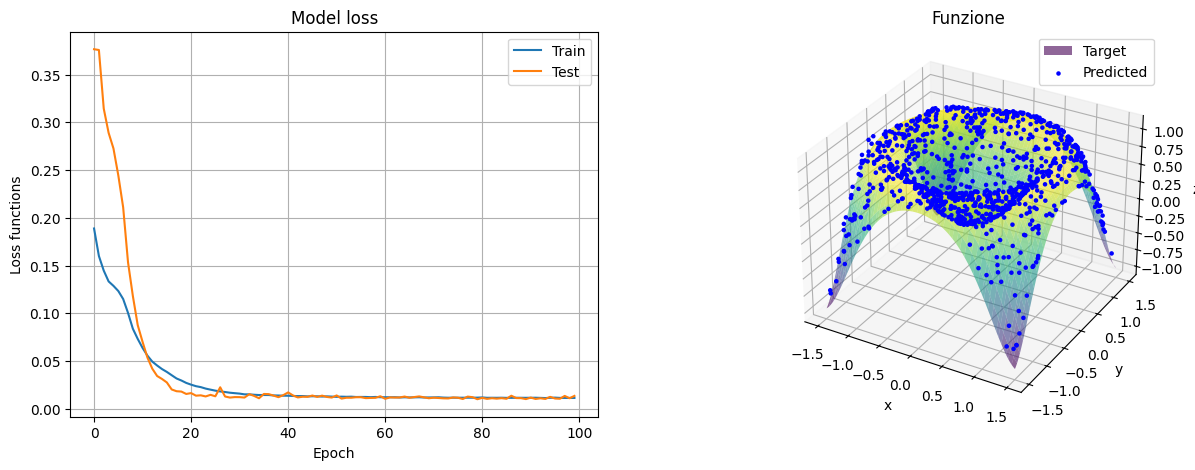

In [191]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.title.set_text('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss functions')
ax.legend(['Train', 'Test'], loc='best')
ax.grid(True)


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.title.set_text('Funzione')
xx, yy = np.meshgrid(xy_valid[:, 0], xy_valid[:, 1])       # Griglia 2D
z_grid = np.sin(xx**2 + yy**2)
ax.plot_surface(xx, yy, z_grid, cmap = 'viridis', alpha = 0.6, label='Target')

xy_pred = np.zeros((1000, 2))
xy_pred [:,0] = np.random.uniform(-1.5, 1.5, 1000)
xy_pred [:,1] = np.random.uniform(-1.5, 1.5, 1000)
z_pred = model.predict(xy_pred).ravel()

ax.scatter(xy_pred[:, 0], xy_pred[:, 1], z_pred, c='b', marker='.', alpha = 1, label='Predicted')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc=0)
ax.grid(True)
plt.show()